# **AUTHOR : Emanuel ALIDJINOU**

# Unsupervised Clustering Challenge
Clustering is an unsupervised machine learning technique in which we are training a model to group similar entities into clusters based on their features.

In this exercise,I'll separate a dataset consisting of three numeric features (A, B, and C) into clusters.

I will identify the number of discrete clusters present in the data, and create a clustering model that separates the data into that number of clusters. And finally I'll also visualize the clusters to evaluate the level of separation achieved by my model.

# **Importing the necessary libraries**

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [37]:
# Display the dataset
url = "https://drive.google.com/uc?export=download&id=1cycDXIRivjVAHVSHqACeRfJEVl2lrmf7"
data = pd.read_csv(url)
data

,A,B,C
0,-0.087492,0.398000,0.014275
1,-1.071705,-0.546473,0.072424
2,2.747075,2.012649,3.083964
3,3.217913,2.213772,4.260312
4,-0.607273,0.793914,-0.516091
...,...,...,...
995,1.035455,1.916280,1.535641
996,3.479744,3.747277,3.038687
997,2.422571,1.771780,1.729732
998,-0.237440,-0.029278,0.077298


# Exploratory Data Analysis (EDA)


**Check for Missing Values and Duplicates**

In [38]:
# checking if theres missing value(S)
print("\nMissing values :", data.isnull().sum().sum())


Missing values : 0


In [39]:
# Duplicate values verification
print("Duplicated rows :", data.duplicated().sum())

Duplicated rows : 0


**Data Overview and Descriptive Statistics**

In [40]:
# Data Overview
print("=== Data Overview ===")
print(data.info())

=== Data Overview ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   C       1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB
None


In [41]:
# Descriptive statistics
print("\n=== Descriptive statistics ===")
print(data.describe().T)


=== Descriptive statistics ===
    count      mean       std       min       25%       50%       75%  \
A  1000.0  1.513081  1.250841 -1.649121  0.542161  1.520402  2.483222   
B  1000.0  1.520776  1.247587 -1.631006  0.561720  1.526202  2.505169   
C  1000.0  1.498351  1.267040 -1.921651  0.483172  1.466841  2.485410   

        max  
A  4.497581  
B  4.442727  
C  4.678731  


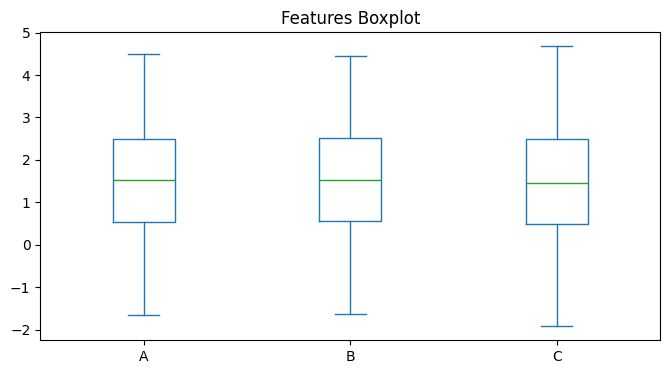

In [42]:
# features distributions
data[['A','B','C']].plot.box(figsize=(8,4))
plt.title("Features Boxplot")
plt.show()

In [43]:
# Correlation matrix between variables.
cor =  data.corr()
cor

,A,B,C
A,1.000000,0.771558,0.773720
B,0.771558,1.000000,0.776396
C,0.773720,0.776396,1.000000


The high correlation values (approximately 0.77) across all variable pairs (A-B, A-C, B-C) strongly suggest that these three original dimensions are highly redundant, carrying much of the same information. This high degree of multicollinearity is the core reason why Principal Component Analysis (PCA) is recommended. By applying PCA, the three correlated variables can be condensed into two uncorrelated principal components (PC1 and PC2), maximizing the variance captured. Projecting the data onto these two new components will yield a significantly better and more meaningful 2D visualization of the underlying cluster structure than using any pairing of the original variables.

# Dataset Preparation

In [44]:
# standardizing the datasets
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Principal Component Analysis (PAC)

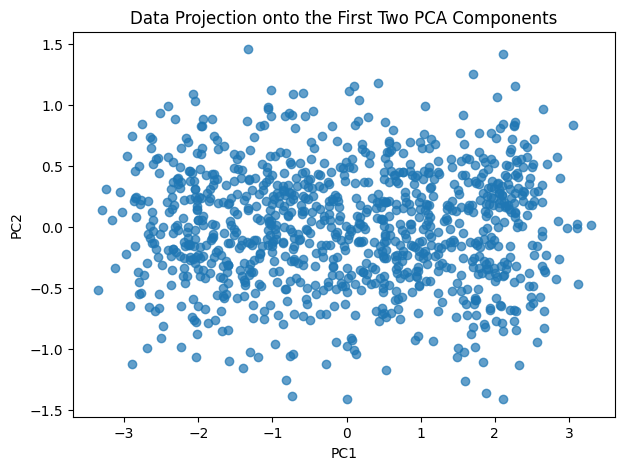

In [45]:
# ============================================================
# Dimensionality Reduction with PCA (2 components)
# ============================================================
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(data_scaled)

plt.figure(figsize=(7,5))
plt.scatter(pca_result[:,0], pca_result[:,1], alpha=0.7)
plt.title("Data Projection onto the First Two PCA Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [46]:
#DataFrame with PC1 and PC2
pca_data = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_data

,PC1,PC2
0,-1.935502,-0.239261
1,-2.800313,-0.452565
2,1.520602,0.270140
3,2.367760,0.261191
4,-2.233988,-0.648958
...,...,...
995,-0.020178,-0.488010
996,2.641123,-0.033186
997,0.641366,0.422978
998,-2.173759,-0.154754


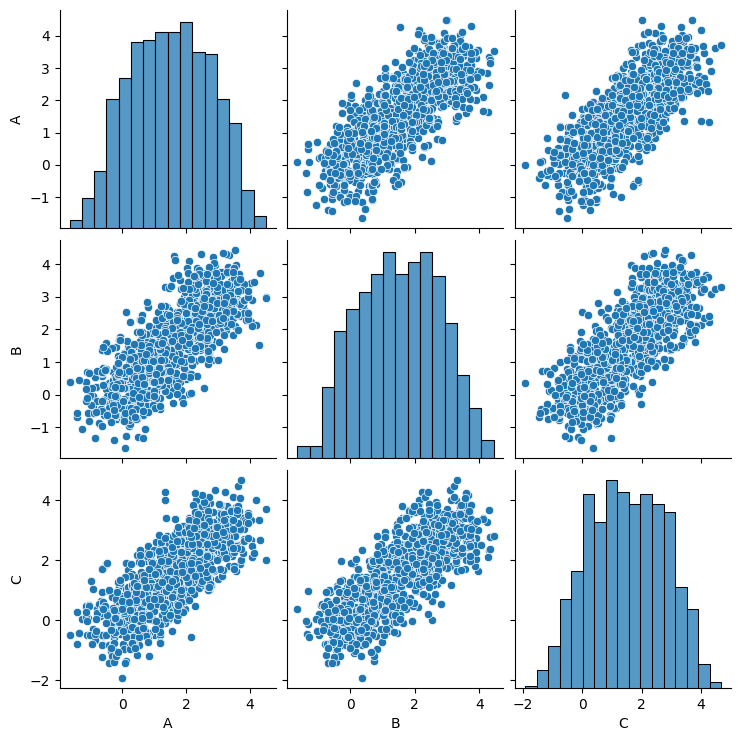

In [47]:
# Pairplot Visualization to Explore Structure
sns.pairplot(data)
plt.show()

# Optimal Number of Classes Detection

**Elbow Method for Optimal k Selection**

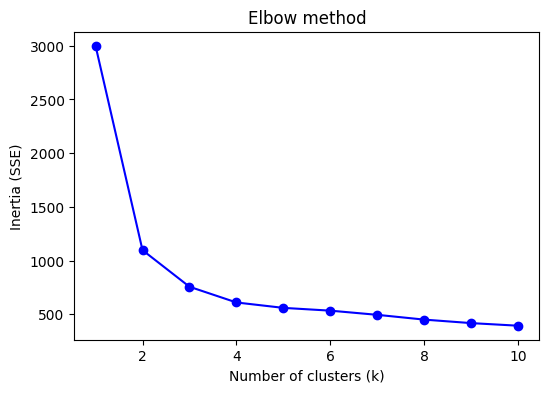

In [48]:
# ============================================================
# Elbow Method for Optimal k Selection
inertia = []
K = range(1,11)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(data_scaled)
    inertia.append(model.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow method')
plt.show()

This chart illustrates the Elbow Method for determining the optimal number of clusters ($k$) in K-Means, by plotting the Inertia (SSE) against the number of clusters. Inertia decreases very rapidly until $k=2$, after which the decrease slows down significantly, forming a clear point of inflection (or elbow). The optimal number of classes ($k$) is 2, as this is the point where the curve begins to flatten, signifying that the addition of further clusters yields no significant improvement (marginal gain) in the reduction of Inertia.

In [49]:
print("Silhouette Scores for different k values:\n")

silhouette_scores = {}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, labels)
    silhouette_scores[k] = score
    print(f"k = {k} → Silhouette Score = {score:.3f}")

Silhouette Scores for different k values:

k = 2 → Silhouette Score = 0.505
k = 3 → Silhouette Score = 0.386
k = 4 → Silhouette Score = 0.326
k = 5 → Silhouette Score = 0.292
k = 6 → Silhouette Score = 0.276
k = 7 → Silhouette Score = 0.242
k = 8 → Silhouette Score = 0.235
k = 9 → Silhouette Score = 0.232
k = 10 → Silhouette Score = 0.230


The highest silhouette score of 0.505 is achieved at $k=2$, which confirms the conclusion of the Elbow Method that two clusters represent the best grouping solution for this dataset.

# Modélisation : K-Means


In [50]:
# Let's take k = 2 as optimal
# ============================================================
# Modeling: K-Means
kmeans = KMeans(n_clusters = 2, random_state = 42)
data['Cluster_KMeans'] = kmeans.fit_predict(data_scaled)
data.head()

,A,B,C,Cluster_KMeans
0,-0.087492,0.398000,0.014275,1
1,-1.071705,-0.546473,0.072424,1
2,2.747075,2.012649,3.083964,0
3,3.217913,2.213772,4.260312,0
4,-0.607273,0.793914,-0.516091,1


In [51]:
print('\nCluster assignment counts:')
print(data['Cluster_KMeans'].value_counts())


Cluster assignment counts:
Cluster_KMeans
0    516
1    484
Name: count, dtype: int64


The K-Means model divided the dataset into two nearly balanced clusters, with Cluster 0 containing 516 data points and Cluster 1 containing 484 data points.

# Visualization of Classes to View K-Means Separation Level

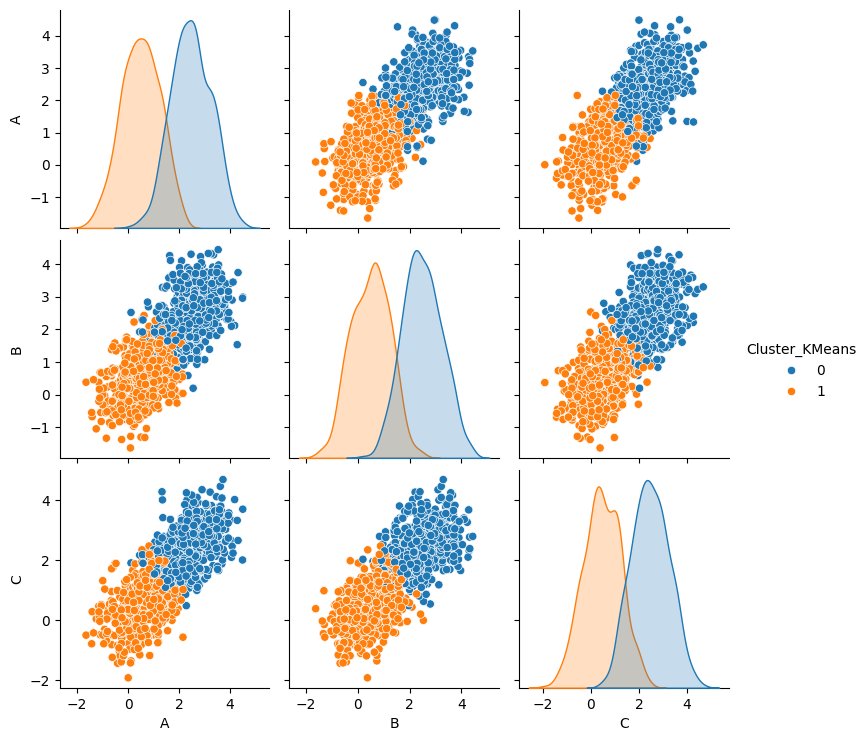

In [52]:
# Visualization of K-Means clusters in 2D
sns.pairplot(data, hue='Cluster_KMeans', palette='tab10')
plt.show()

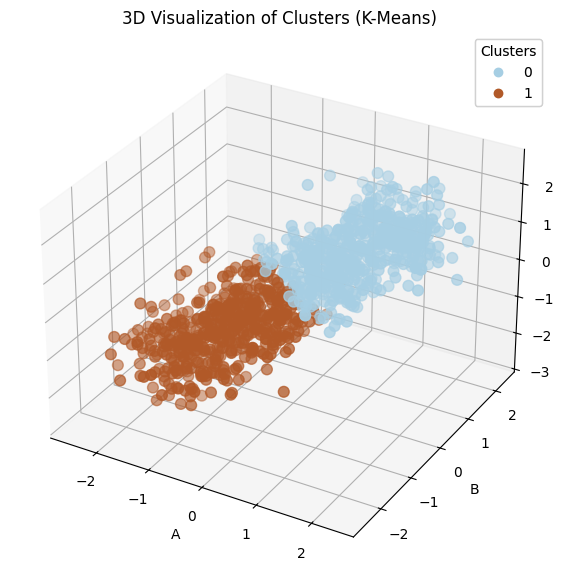

In [53]:
# 3D Visualization
# We retrieve the indices of columns A, B, and C in the DataFrame
cols = ['A', 'B', 'C']
A_idx = data.columns.get_loc('A')
B_idx = data.columns.get_loc('B')
C_idx = data.columns.get_loc('C')

# We use data_scaled (which is a numpy array)
x = data_scaled[:, A_idx]
y = data_scaled[:, B_idx]
z = data_scaled[:, C_idx]

clusters = data['Cluster_KMeans']

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color by cluster
scatter = ax.scatter(x, y, z, c=clusters, cmap='Paired', s=60)

# Axis labels
ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('C')

# Legend
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.title("3D Visualization of Clusters (K-Means)")
plt.show()

# Modeling : Gaussian Mixture Model (GMM)


In [54]:
print("Silhouette Scores for GMM with different k values:\n")

silhouette_scores_gmm = {}

for k in range(2, 11):
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels = gmm.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, labels)
    silhouette_scores_gmm[k] = score
    print(f"k = {k} → Silhouette Score (GMM) = {score:.3f}")

Silhouette Scores for GMM with different k values:

k = 2 → Silhouette Score (GMM) = 0.504
k = 3 → Silhouette Score (GMM) = 0.387
k = 4 → Silhouette Score (GMM) = 0.324
k = 5 → Silhouette Score (GMM) = 0.294
k = 6 → Silhouette Score (GMM) = 0.276
k = 7 → Silhouette Score (GMM) = 0.237
k = 8 → Silhouette Score (GMM) = 0.221
k = 9 → Silhouette Score (GMM) = 0.215
k = 10 → Silhouette Score (GMM) = 0.202


The highest silhouette score for GMM is 0.504 at $k=2$, a result nearly identical to that obtained with K-Means, suggesting that both models agree in identifying two clusters as the most coherent and distinct grouping structure within the data.

In [55]:
# Let's take k = 2 as optimal
# ============================================================
# Modeling: Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components = 2, random_state = 42)
data['Cluster_GMM'] = gmm.fit_predict(data_scaled)
data.drop(columns='Cluster_KMeans').head()

,A,B,C,Cluster_GMM
0,-0.087492,0.398000,0.014275,1
1,-1.071705,-0.546473,0.072424,1
2,2.747075,2.012649,3.083964,0
3,3.217913,2.213772,4.260312,0
4,-0.607273,0.793914,-0.516091,1


In [56]:
print('\nCluster assignment counts:')
print(data['Cluster_GMM'].value_counts())


Cluster assignment counts:
Cluster_GMM
0    512
1    488
Name: count, dtype: int64


The GMM model assigned the data points to its two clusters almost perfectly balanced, with 512 points in Cluster 0 and 488 points in Cluster 1.

# Visualization of Classes to View GMM Separation Level

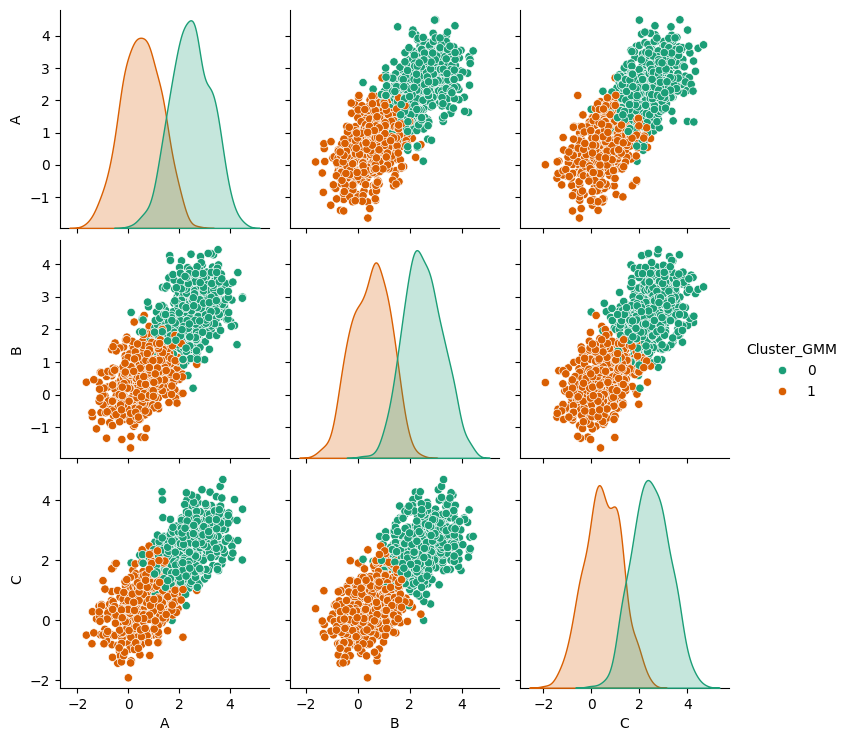

In [57]:
# Visualization of GMM clusters in 2D
sns.pairplot(data.drop(columns='Cluster_KMeans'), hue='Cluster_GMM', palette='Dark2')
plt.show()

Text(0.5, 0.92, '3D Visualization of Clusters (GMM)')

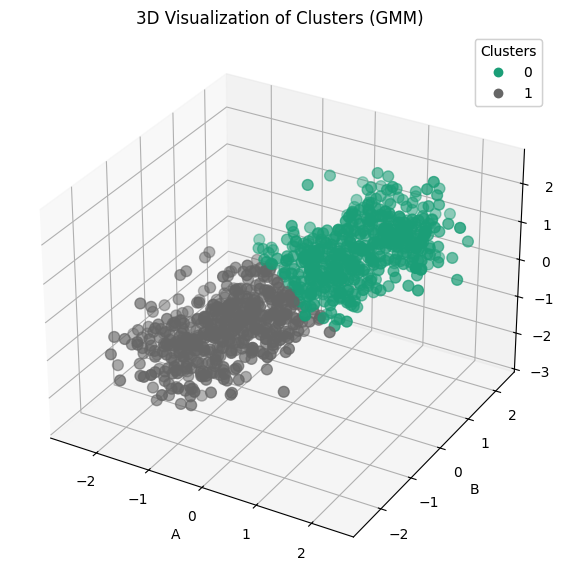

In [58]:
# 3D Visualization
# We retrieve the indices of columns A, B, and C in the DataFrame
cols = ['A', 'B', 'C']
A_idx = data.columns.get_loc('A')
B_idx = data.columns.get_loc('B')
C_idx = data.columns.get_loc('C')

# We use data_scaled (which is a numpy array)
x = data_scaled[:, A_idx]
y = data_scaled[:, B_idx]
z = data_scaled[:, C_idx]

clusters = data['Cluster_GMM']

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color by cluster
scatter = ax.scatter(x, y, z, c=clusters, cmap='Dark2', s=60)

# Axis labels
ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('C')

# Legend
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.title("3D Visualization of Clusters (GMM)")

# Cluster Visualization on Principal Components

In [59]:
# Add the Cluster labels
pca_data['Cluster_KMeans'] = data['Cluster_KMeans'].values
pca_data['Cluster_GMM'] = data['Cluster_GMM'].values
print("First few rows of the PCA DataFrame:")
print(pca_data.head())

First few rows of the PCA DataFrame:
        PC1       PC2  Cluster_KMeans  Cluster_GMM
0 -1.935502 -0.239261               1            1
1 -2.800313 -0.452565               1            1
2  1.520602  0.270140               0            0
3  2.367760  0.261191               0            0
4 -2.233988 -0.648958               1            1


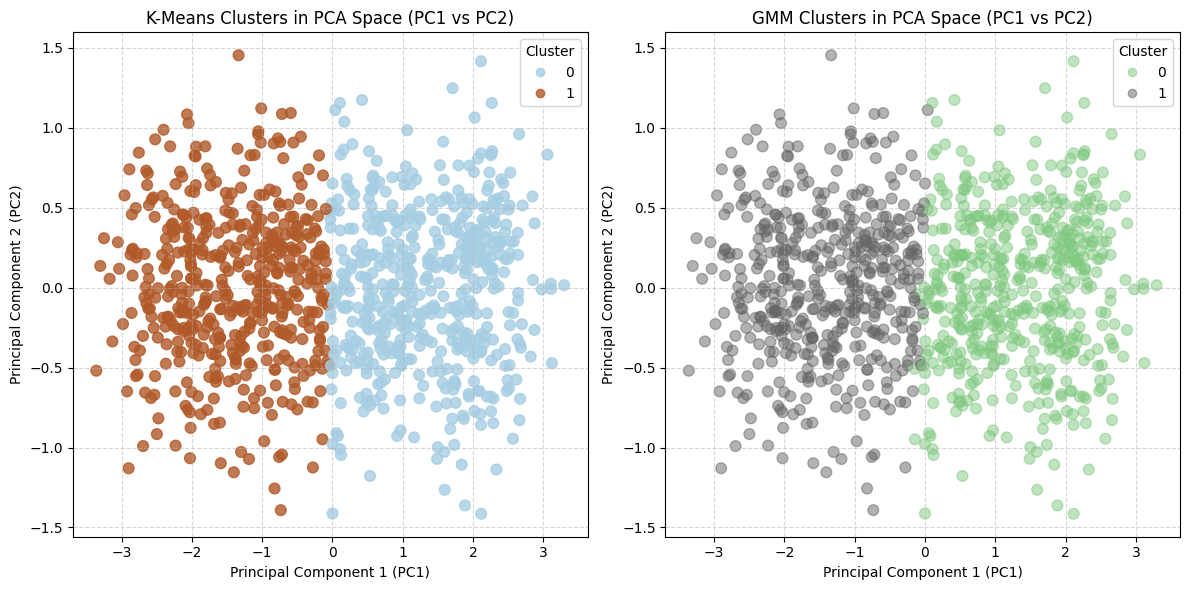

In [60]:
# ============================================================
# Visualize K-Means Clusters on PCA Components
# ============================================================
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
scatter_kmeans = plt.scatter(pca_data['PC1'], pca_data['PC2'],
                c=pca_data['Cluster_KMeans'],cmap='Paired',
                s=60,
                alpha=0.8)
plt.title("K-Means Clusters in PCA Space (PC1 vs PC2)")
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.legend(*scatter_kmeans.legend_elements(), title="Cluster")
plt.grid(True, linestyle='--', alpha=0.5)

# ============================================================
# Visualize GMM Clusters on PCA Components
# ============================================================
plt.subplot(1, 2, 2)
scatter_gmm = plt.scatter(pca_data['PC1'], pca_data['PC2'],
              c=pca_data['Cluster_GMM'],
              cmap='Accent',
              s=60,
              alpha=0.5)
plt.title("GMM Clusters in PCA Space (PC1 vs PC2)")
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.legend(*scatter_gmm.legend_elements(), title="Cluster")
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()